<a href="https://colab.research.google.com/github/bing020815/text_prediction_application/blob/master/notebooks/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import re

In [0]:
pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('colheader_justify', 'center')

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/bing020815/text_prediction_application/master/data/reviews/train.csv', index_col=0)

In [4]:
df.head()

,label,reviews
0,1,"For a movie that gets no respect there sure are a lot of memorable quotes listed for this gem. Imagine a movie where Joe Piscopo is actually funny! Maureen Stapleton is a scene stealer. The Moroni character is an absolute scream. Watch for Alan ""The Skipper"" Hale jr. as a police Sgt."
1,1,"Bizarre horror movie filled with famous faces but stolen by Cristina Raines (later of TV's ""Flamingo Road"") as a pretty but somewhat unstable model with a gummy smile who is slated to pay for her attempted suicides by guarding the Gateway to Hell! The scenes with Raines modeling are very well captured, the mood music is perfect, Deborah Raffin is charming as Cristina's pal, but when Raines moves into a creepy Brooklyn Heights brownstone (inhabited by a blind priest on the top floor), things really start cooking. The neighbors, including a fantastically wicked Burgess Meredith and kinky couple Sylvia Miles & Beverly D'Angelo, are a diabolical lot, and Eli Wallach is great fun as a wily police detective. The movie is nearly a cross-pollination of ""Rosemary's Baby"" and ""The Exorcist""--but what a combination! Based on the best-seller by Jeffrey Konvitz, ""The Sentinel"" is entertainingly spooky, full of shocks brought off well by director Michael Winner, who mounts a thoughtfully downbea..."
2,1,"A solid, if unremarkable film. Matthau, as Einstein, was wonderful. My favorite part, and the only thing that would make me go out of my way to see this again, was the wonderful scene with the physicists playing badmitton, I loved the sweaters and the conversation while they waited for Robbins to retrieve the birdie."
3,1,"It's a strange feeling to sit alone in a theater occupied by parents and their rollicking kids. I felt like instead of a movie ticket, I should have been given a NAMBLA membership. Based upon Thomas Rockwell's respected Book, How To Eat Fried Worms starts like any children's story: moving to a new town. The new kid, fifth grader Billy Forrester was once popular, but has to start anew. Making friends is never easy, especially when the only prospect is Poindexter Adam. Or Erica, who at 4 1/2 feet, is a giant. Further complicating things is Joe the bully. His freckled face and sleeveless shirts are daunting. He antagonizes kids with the Death Ring: a Crackerjack ring that is rumored to kill you if you're punched with it. But not immediately. No, the death ring unleashes a poison that kills you in the eight grade. Joe and his axis of evil welcome Billy by smuggling a handful of slimy worms into his thermos. Once discovered, Billy plays it cool, swearing that he eats worms all the ti..."
4,1,"You probably all already know this by now, but 5 additional episodes never aired can be viewed on ABC.com I've watched a lot of television over the years and this is possibly my favorite show, ever. It's a crime that this beautifully written and acted show was canceled. The actors that played Laura, Whit, Carlos, Mae, Damian, Anya and omg, Steven Caseman - are all incredible and so natural in those roles. Even the kids are great. Wonderful show. So sad that it's gone. Of course I wonder about the reasons it was canceled. There is no way I'll let myself believe that Ms. Moynahan's pregnancy had anything to do with it. It was in the perfect time slot in this market. I've watched all the episodes again on ABC.com - I hope they all come out on DVD some day. Thanks for reading."


## Vectorization 

In [0]:
reviews = df.reviews
label = df.label # 1:pos ; 0:neg

In [6]:
print('There are {} copora'.format(reviews.shape))

There are (25000,) copora


In [7]:
reviews.head()

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               For a movie that gets no respect there sure are a lot of memorable quotes listed for this gem. Imagine a movie where Joe Piscopo is actually funny! Maureen Stapleton is a scene stealer. The Moroni character is an absolute scream. Watch for Alan "The Skipper" Hale jr. as a police 

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [9]:
vect.fit(reviews)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [0]:
reviews_dtm = vect.transform(reviews)

In [11]:
featres_name = vect.get_feature_names()
featres_name[:100]

['00',
 '000',
 '0000000000001',
 '00001',
 '00015',
 '000s',
 '001',
 '003830',
 '006',
 '007',
 '0079',
 '0080',
 '0083',
 '0093638',
 '00am',
 '00pm',
 '00s',
 '01',
 '01pm',
 '02',
 '020410',
 '029',
 '03',
 '04',
 '041',
 '05',
 '050',
 '06',
 '06th',
 '07',
 '08',
 '087',
 '089',
 '08th',
 '09',
 '0f',
 '0ne',
 '0r',
 '0s',
 '10',
 '100',
 '1000',
 '1000000',
 '10000000000000',
 '1000lb',
 '1000s',
 '1001',
 '100b',
 '100k',
 '100m',
 '100min',
 '100mph',
 '100s',
 '100th',
 '100x',
 '100yards',
 '101',
 '101st',
 '102',
 '102nd',
 '103',
 '104',
 '1040',
 '1040a',
 '1040s',
 '105',
 '1050',
 '105lbs',
 '106',
 '106min',
 '107',
 '108',
 '109',
 '10am',
 '10lines',
 '10mil',
 '10min',
 '10minutes',
 '10p',
 '10pm',
 '10s',
 '10star',
 '10th',
 '10x',
 '10yr',
 '11',
 '110',
 '1100',
 '11001001',
 '1100ad',
 '111',
 '112',
 '1138',
 '114',
 '1146',
 '115',
 '116',
 '117',
 '11f',
 '11m']

In [12]:
# how many tokens? 
len(featres_name)

74849

In [13]:
reviews_dtm.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [0]:
reviews_df = pd.DataFrame(reviews_dtm.toarray(), columns=featres_name)

In [15]:
reviews_df.head()

,00,000,0000000000001,00001,00015,000s,001,003830,006,007,0079,0080,0083,0093638,00am,00pm,00s,01,01pm,02,020410,029,03,04,041,05,050,06,06th,07,08,087,089,08th,09,0f,0ne,0r,0s,10,...,zx81,zy,zyada,zyuranger,zz,zzzz,zzzzz,zzzzzzzz,zzzzzzzzzzzz,zzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz,zé,álex,álvaro,ánd,ángel,ángela,âme,är,ääliöt,äänekoski,åge,åmål,æsthetic,écran,élan,émigré,émigrés,était,état,étc,évery,êxtase,ís,ísnt,østbye,über,üvegtigris
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
type(featres_name)

list

In [17]:
%time
feature_sum = reviews_df.sum(axis=0)

CPU times: user 2 µs, sys: 2 µs, total: 4 µs
Wall time: 7.87 µs


In [0]:
feature_counts= feature_sum.sort_values(ascending=False)

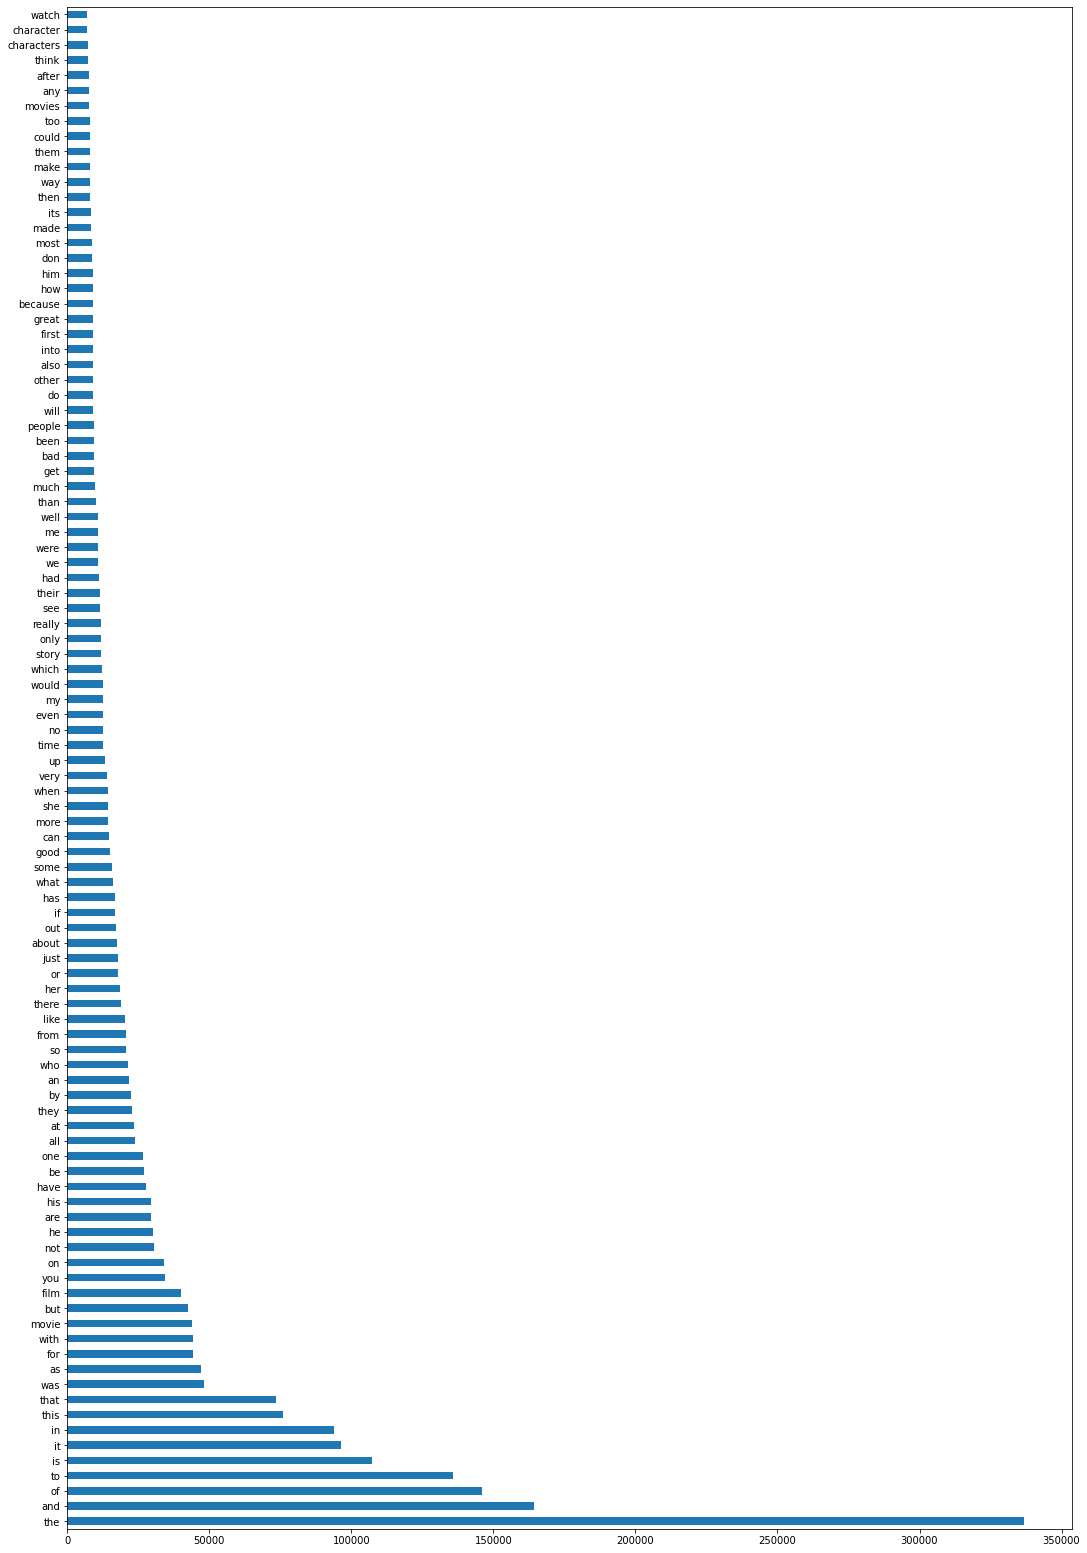

In [19]:
feature_counts[:100].plot(kind='barh', figsize=(18,28))

In [20]:
pip install nltk

In [21]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))

In [23]:
count = 0
for i,w in enumerate(feature_counts[:100].index):
    if w in stopWords:
        print(f'{i+1}: {w}')
        count +=1
print(count)

1: the
2: and
3: of
4: to
5: is
6: it
7: in
8: this
9: that
10: was
11: as
12: for
13: with
15: but
17: you
18: on
19: not
20: he
21: are
22: his
23: have
24: be
26: all
27: at
28: they
29: by
30: an
31: who
32: so
33: from
35: there
36: her
37: or
38: just
39: about
40: out
41: if
42: has
43: what
44: some
46: can
47: more
48: she
49: when
50: very
51: up
53: no
55: my
57: which
59: only
62: their
63: had
64: we
65: were
66: me
68: than
72: been
74: will
75: do
76: other
78: into
81: because
82: how
83: him
84: don
85: most
87: its
88: then
91: them
93: too
95: any
96: after
72
